# Practica 2

### Imports

In [18]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## Ejercicio 1

### Data reading

In [5]:
archivo_fletes='flete-aereo-vacunas-covid19-al-2021-06-28.xlsx'
dataFlete=pd.read_excel(archivo_fletes, skiprows=4).dropna()
print(dataFlete.columns)

Index(['organismo', 'expediente', 'financiamiento', 'acto_conclusión',
       'descripción', 'prestador', 'CUIT', 'estado', 'factura_nro',
       'factura_moneda_monto', 'guía_nro', 'guía_moneda_monto', 'fecha_guía',
       'vuelo ', 'bienes_transportados', 'proveedor_bienes_transportados',
       'operación', 'comprador_donante', 'origen'],
      dtype='object')


### Porcentaje de cada vuelo

In [7]:
df_agrupado = dataFlete.groupby('vuelo ')
total_vuelos=df_agrupado.size()
numero_total_vuelos=total_vuelos.sum()
print(numero_total_vuelos)
sum=0
for vuelo in total_vuelos:
    porcentaje=(vuelo/numero_total_vuelos)*100
    print(f'{porcentaje} %')
    sum+=porcentaje

print(f'{sum} %')



59
11.864406779661017 %
22.033898305084744 %
18.64406779661017 %
15.254237288135593 %
6.779661016949152 %
5.084745762711865 %
10.16949152542373 %
3.389830508474576 %
1.694915254237288 %
1.694915254237288 %
1.694915254237288 %
1.694915254237288 %
100.0 %


### Promedio de lo facturado

#### Cleaning Data

In [8]:
total_facturado_usd=dataFlete['factura_moneda_monto'].str.startswith('USD')
total_facturado_eur=dataFlete['factura_moneda_monto'].str.startswith('EUR')
valores_usd = dataFlete[total_facturado_usd]['factura_moneda_monto'].str[4:]
valores_eur=dataFlete[total_facturado_eur]['factura_moneda_monto'].str[4:]

valores_limpios_usd=valores_usd.str.replace(',','.').str.replace('.','').str.replace(' ','').astype(float)
valores_limpios_eur=valores_eur.str.replace(',','.').str.replace('.','').str.replace(' ','').astype(float)


#### Calculo de Promedio

In [12]:
valores_limpios_eur=valores_limpios_eur.sum()
valores_limpios_usd=valores_limpios_usd.sum()


## Ejercicio 2


### Data reading

In [8]:
archivo_incendios='incendios-cantidad-causas-provincia-2022.csv'
data_incendios=pd.read_csv(archivo_incendios, skiprows=3, encoding='latin-1').dropna()

data_incendios['natural'].replace('-', 0, inplace=True)


/tmp/ipykernel_4549/2739636694.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_incendios['natural'].replace('-', 0, inplace=True)


#### Numero de incendios totales anuales


In [12]:
total_incendios_año = data_incendios.groupby('anio')['total'].sum().to_dict()
for año, total_incendios in total_incendios_año.items():
  print(f"Año: {año}, Total de incendios: {total_incendios}")

Año: 1993, Total de incendios: 538
Año: 1994, Total de incendios: 852
Año: 1995, Total de incendios: 4145
Año: 1996, Total de incendios: 4057
Año: 1997, Total de incendios: 4660
Año: 1998, Total de incendios: 8681
Año: 1999, Total de incendios: 10487
Año: 2000, Total de incendios: 10559
Año: 2001, Total de incendios: 7839
Año: 2002, Total de incendios: 10566
Año: 2003, Total de incendios: 12191
Año: 2004, Total de incendios: 12629
Año: 2005, Total de incendios: 17260
Año: 2006, Total de incendios: 11321
Año: 2007, Total de incendios: 10994
Año: 2008, Total de incendios: 17682
Año: 2009, Total de incendios: 10309
Año: 2010, Total de incendios: 7504
Año: 2011, Total de incendios: 6738
Año: 2012, Total de incendios: 5599
Año: 2013, Total de incendios: 6684
Año: 2014, Total de incendios: 6951
Año: 2015, Total de incendios: 6045
Año: 2016, Total de incendios: 7478
Año: 2017, Total de incendios: 7414
Año: 2018, Total de incendios: 9136
Año: 2019, Total de incendios: 6429
Año: 2020, Total de 

#### Gráfico de barras con el número de incendios totales para cada año del período 1993-2021 para la provincia de Córdoba

Año: 2005, Total de incendios: 763
Año: 2010, Total de incendios: 192
Año: 2015, Total de incendios: 3
Año: 2016, Total de incendios: 283
Año: 2017, Total de incendios: 282
Año: 2018, Total de incendios: 295


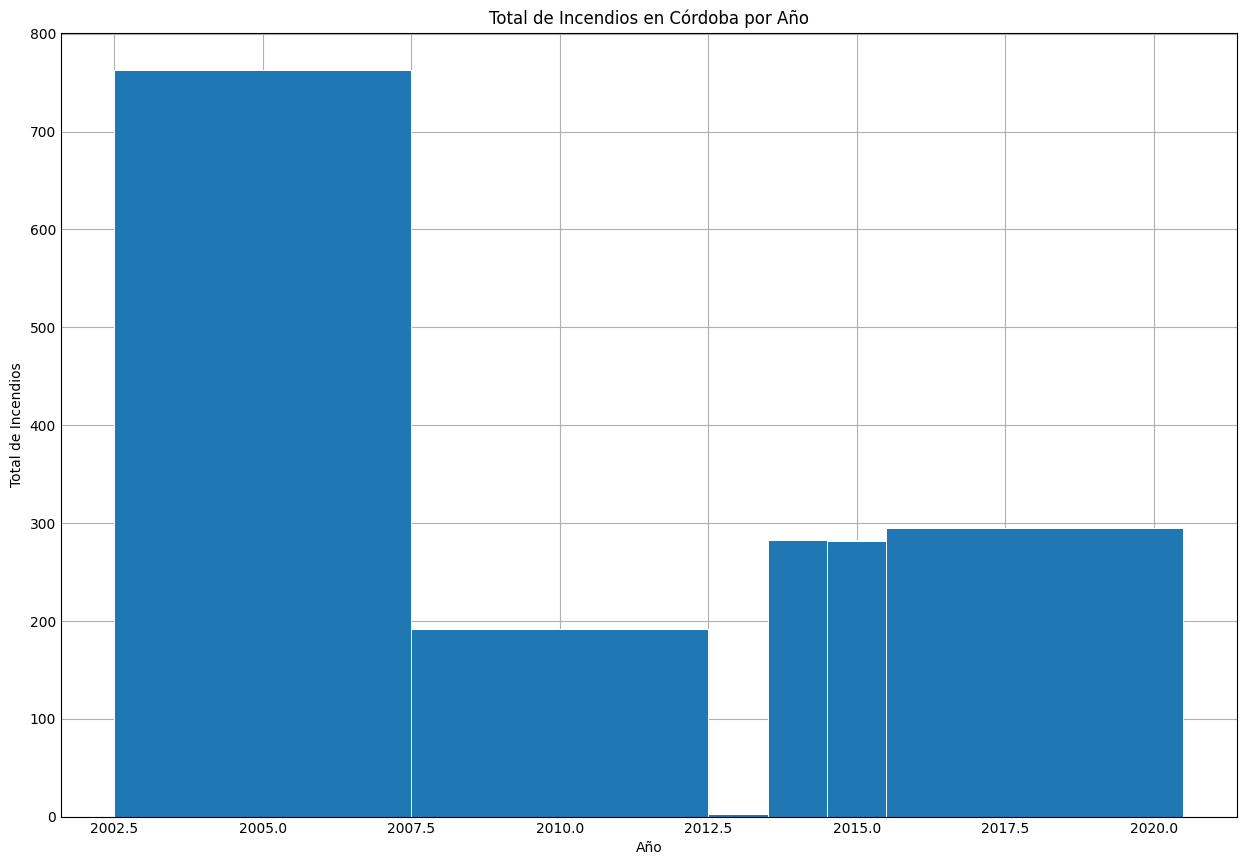

In [71]:
data_incendios_cordoba=data_incendios[data_incendios['provincia']== 'Cordoba']

total_incendios_año_cordoba = data_incendios_cordoba.groupby('anio')['total'].sum().to_dict()
for año, total_incendios in total_incendios_año_cordoba.items():
  print(f"Año: {año}, Total de incendios: {total_incendios}")


plt.style.use('_mpl-gallery')
x = total_incendios_año_cordoba.keys()
y = total_incendios_año_cordoba.values()

plt.figure(figsize=(12, 8))

plt.bar(x, y, width=5, edgecolor="white", linewidth=0.7)


plt.title("Total de Incendios en Córdoba por Año")
plt.xlabel("Año")
plt.ylabel("Total de Incendios")

plt.show()


#### gráfico de barras que compare el número de incendios intencionales, por negligencia y naturales para el período 2015-2021 en la provincia de Santa Fe

In [86]:
data_incendios_santa_fe=data_incendios[data_incendios['provincia']== 'Santa Fe']
data_incendios_santa_fe_intervalo = data_incendios_santa_fe[
    (data_incendios_santa_fe['anio'] >= 2015) &
    (data_incendios_santa_fe['anio'] <= 2021)
]
data_incendios_santa_fe_intervalo_intencional=data_incendios_santa_fe_intervalo['intencional']
data_incendios_santa_fe_intervalo_negligencia=data_incendios_santa_fe_intervalo['negligencia']
data_incendios_santa_fe_intervalo_natural=data_incendios_santa_fe_intervalo['natural']

intervalo_años=[2015,2016,2017,2018,2019,2020,2021]
plt.style.use('_mpl-gallery')
plt.figure(figsize=(12, 8))
x=intervalo_años
y=

plt.figure(figsize=(12, 8))

